In [ ]:
#!pip install ast
!pip install transformers
!pip install pyyaml==5.4.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
from google.colab import drive
import re
from wordcloud import WordCloud
import spacy
import nltk
import en_core_web_sm
from collections import defaultdict
from transformers import pipeline

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid_tweets_2020-2021.csv")

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,0,https://twitter.com/persi_giovanni/status/1476...,2021-12-30 23:24:14+00:00,Sei inutile come un tampone rapido. \n\n#Posit...,Sei inutile come un tampone rapido. \n\n#Posit...,1476695654663610372,"{'username': 'persi_giovanni', 'id': 134822023...",0,1,1,0,1476695654663610372,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 13.0838725, 'latitude': 43.7262228}","{'fullName': 'Mondolfo, Marche', 'name': 'Mond...","['Positivo', 'Covid', 'megagreenpass', 'lockdo...",NaN
1,1,1,https://twitter.com/annalisatheatro/status/147...,2021-12-30 22:59:03+00:00,VI SBLOCCO UN RICORDO . ERA IL 2019 E BRINDAVA...,VI SBLOCCO UN RICORDO . ERA IL 2019 E BRINDAVA...,1476689319146536960,"{'username': 'annalisatheatro', 'id': 34757913...",0,0,1,0,1476689319146536960,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 11.9017633, 'latitude': 42.2538717}","{'fullName': 'Vetralla, Lazio', 'name': 'Vetra...","['31dicembre', 'Covid_19', 'Covid', 'italia', ...",NaN
2,2,2,https://twitter.com/DilfirazDegerli/status/147...,2021-12-30 22:18:06+00:00,"Covid-19, Türkiye'de 30 Aralık'ta 139 toplamda...","Covid-19, Türkiye'de 30 Aralık'ta 139 toplamda...",1476679010344185861,"{'username': 'DilfirazDegerli', 'id': 28401298...",0,1,1,0,1476679010344185861,tr,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,['https://www.istanbulgercegi.com/covid-19-tur...,['https://t.co/54lqvNvbQC'],[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,"[{'username': 'istanbulgercegi', 'id': 2892180...","{'longitude': 26.5279979, 'latitude': 39.1665387}","{'fullName': 'Ayvalık, Balıkesir', 'name': 'Ay...","['COVID19', 'Covid_19', 'Covid', 'Koronavirüs'...",NaN
3,3,3,https://twitter.com/WafaaAlansarya1/status/147...,2021-12-30 21:35:56+00:00,"Moreover, the smart soldiers of Allaah will in...","Moreover, the smart soldiers of Allaah will in...",1476668401787490306,"{'username': 'WafaaAlansarya1', 'id': 13841317...",0,7,1,0,1476668401787490306,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,['https://awaited-mahdi.com/showthread.php?p=3...,['https://t.co/dMGQmUDKxN'],NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 41.8153438, 'latitude': 12.1068662}","{'fullName': 'Yemen', 'name': 'Yemen', 'type':...","['ItIsCosmicAndCovidiousWar', 'Covid']",NaN
4,4,4,https://twitter.com/dedesi_heidinin/status/147...,2021-12-30 17:17:12+00:00,#yeniyıl #yılbaşı #pahalı #dolar #covid #2022 ...,#yeniyıl #yılbaşı #pahalı #dolar #covid #2022 ...,1476603289957502976,"{'username': 'dedesi_heidinin', 'id': 33311944...",0,0,0,0,1476603289957502976,tr,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 26.7231666, 'latitude': 38.2832034}","{'fullName': 'İzmir, Türkiye', 'name': 'İzmir'...","['yeniyıl', 'yılbaşı', 'pahalı', 'dolar', 'cov...",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12391 entries, 0 to 12390
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12391 non-null  int64  
 1   Unnamed: 0.1      12391 non-null  int64  
 2   url               12391 non-null  object 
 3   date              12391 non-null  object 
 4   content           12391 non-null  object 
 5   renderedContent   12391 non-null  object 
 6   id                12391 non-null  int64  
 7   user              12391 non-null  object 
 8   replyCount        12391 non-null  int64  
 9   retweetCount      12391 non-null  int64  
 10  likeCount         12391 non-null  int64  
 11  quoteCount        12391 non-null  int64  
 12  conversationId    12391 non-null  int64  
 13  lang              12391 non-null  object 
 14  source            12391 non-null  object 
 15  sourceUrl         12391 non-null  object 
 16  sourceLabel       12391 non-null  object

In [7]:
fig = px.histogram(data, x = data['lang'], text_auto = True, title = 'Number of languages in the tweets')
fig.show()

In [8]:
#Selecting data only in English language
data = data[data['lang'] == 'en']

In [9]:
print("\n shape of the English Data set:-----> {}".format(data.shape))


 shape of the English Data set:-----> (3924, 29)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3924 entries, 3 to 12390
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3924 non-null   int64  
 1   Unnamed: 0.1      3924 non-null   int64  
 2   url               3924 non-null   object 
 3   date              3924 non-null   object 
 4   content           3924 non-null   object 
 5   renderedContent   3924 non-null   object 
 6   id                3924 non-null   int64  
 7   user              3924 non-null   object 
 8   replyCount        3924 non-null   int64  
 9   retweetCount      3924 non-null   int64  
 10  likeCount         3924 non-null   int64  
 11  quoteCount        3924 non-null   int64  
 12  conversationId    3924 non-null   int64  
 13  lang              3924 non-null   object 
 14  source            3924 non-null   object 
 15  sourceUrl         3924 non-null   object 
 16  sourceLabel       3924 non-null   object 

In [11]:
data.head()

,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
3,3,3,https://twitter.com/WafaaAlansarya1/status/147...,2021-12-30 21:35:56+00:00,"Moreover, the smart soldiers of Allaah will in...","Moreover, the smart soldiers of Allaah will in...",1476668401787490306,"{'username': 'WafaaAlansarya1', 'id': 13841317...",0,7,1,0,1476668401787490306,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,['https://awaited-mahdi.com/showthread.php?p=3...,['https://t.co/dMGQmUDKxN'],NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 41.8153438, 'latitude': 12.1068662}","{'fullName': 'Yemen', 'name': 'Yemen', 'type':...","['ItIsCosmicAndCovidiousWar', 'Covid']",NaN
5,5,5,https://twitter.com/sabri112019/status/1476603...,2021-12-30 17:16:33+00:00,the One behind the global war of corona is the...,the One behind the global war of corona is the...,1476603123552694284,"{'username': 'sabri112019', 'id': 992473964445...",0,7,5,0,1476603123552694284,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 41.8153438, 'latitude': 12.1068662}","{'fullName': 'Yemen', 'name': 'Yemen', 'type':...","['ItIsCosmicAndCovidiousWar', 'Covid']",NaN
9,9,9,https://twitter.com/Mayssi_/status/14765762260...,2021-12-30 15:29:40+00:00,Queue for PCR test today\nStay Safe please🙏\n#...,Queue for PCR test today\nStay Safe please🙏\n#...,1476576226047406088,"{'username': 'Mayssi_', 'id': 7314520632976056...",5,0,20,0,1476576226047406088,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 35.528084937064655, 'latitude': ...","{'fullName': 'Mount Lebanon Hospital', 'name':...","['Covid', 'Omicron', 'PCRtest', 'NewYear2022']",NaN
40,40,40,https://twitter.com/brazil_pavilion/status/147...,2021-12-29 10:37:30+00:00,How do we make a #healthier world #postCovid? ...,How do we make a #healthier world #postCovid? ...,1476140312141643781,"{'username': 'brazil_pavilion', 'id': 14273654...",1,2,6,0,1476140312141643781,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 54.8939725, 'latitude': 24.6182526}","{'fullName': 'Dubai, United Arab Emirates', 'n...","['healthier', 'postCovid', 'BrasilPavilion', '...",NaN
49,49,49,https://twitter.com/fevenmhammed26/status/1476...,2021-12-29 05:15:49+00:00,"My colleague took a sick day today, first time...","My colleague took a sick day today, first time...",1476059357670432771,"{'username': 'fevenmhammed26', 'id': 728144878...",1,0,0,0,1476059357670432771,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 54.8939725, 'latitude': 24.6182526}","{'fullName': 'Dubai, United Arab Emirates', 'n...",['covid'],NaN


In [12]:
places_list = data['place'].tolist()

In [13]:
places_list[20]

"{'fullName': 'Dubai, United Arab Emirates', 'name': 'Dubai', 'type': 'admin', 'country': 'United Arab Emirates', 'countryCode': 'AE'}"

In [14]:
#seperating dictionaries and identifying null indexes
places_dict = []
total_non_values = 0
for index, dicts in enumerate(places_list):
  try:
    dict1 = ast.literal_eval(dicts)
    places_dict.append(dict1)
  except:
    print(f'There is a Non value in index number: {index}')
    total_non_values += 1
print(f'Total Number of Null Values {total_non_values}')

There is a Non value in index number: 884
There is a Non value in index number: 1524
There is a Non value in index number: 1917
There is a Non value in index number: 1944
There is a Non value in index number: 2339
There is a Non value in index number: 3410
Total Number of Null Values 6


In [ ]:
places_dict[0]

In [16]:
countries = []
for country_codes in places_dict:
  countries.append(country_codes['country'])

In [17]:
countries[0]

'Yemen'

In [18]:
df1 = pd.DataFrame({'Country':countries})

In [ ]:
df1.head()

In [ ]:
fig = px.histogram(df1, x=df1['Country'], text_auto = True,width=1500, height=800, title = 'Number of countries encountered', color = df1.Country)
fig.show()

In [ ]:
data.head()

In [22]:
data['lang'].unique()

array(['en'], dtype=object)

In [ ]:
#checking missing values
data.isnull().sum()

In [24]:
#checking for duplicates
data.duplicated().sum()

0

In [25]:
content = data['renderedContent'].tolist()

In [26]:
#contents have duplicated values
#to remove duplicates dataframe is created
df1 = pd.DataFrame({'Content':content})

In [27]:
df1.duplicated().sum()
#124 duplictaes

124

In [28]:
#dropping duplictaes
print("\n shape of the data before removing duplicates: {}\n".format(df1.shape))
df1.drop_duplicates(inplace = True)
print("\n shape of the data after removing duplicates: {}\n".format(df1.shape))


 shape of the data before removing duplicates: (3924, 1)


 shape of the data after removing duplicates: (3800, 1)



In [29]:
new_content = df1['Content'].tolist()

In [30]:
print(data.shape, df1.shape)

(3924, 29) (3800, 1)


In [31]:
len(new_content)

3800

In [32]:
def preprocessing(text):
  #Removing names and links
  sentence = text.lower()
  sentence = re.sub(r'@\w+',"", sentence)
  sentence = re.sub(r'https:[/w/W]+', "", sentence)
  sentence = re.sub(r'\n\n', "", sentence)
  sentence = re.sub(r'\[\w\W]+', '', sentence)
  sentence = re.sub(r'\n', '', sentence)
  sentence = re.sub(r'#', '', sentence)
  sentence = re.sub(r'twitter.com[\w\W]+','', sentence)
  sentence = re.sub(r'([\w]+).([\w]+)/([\w]+)/([\w\W]+)', '', sentence)
  sentence = re.sub(r'@', '', sentence)
  sentence = re.sub(r't.co/\w+','', sentence)
  sentence = re.sub(r'\w+.com', '', sentence)
  sentence = re.sub(r'(\w+).(\w)/\w+','', sentence)
  sentence = re.sub(r' \w/ ','',sentence)
  sentence = re.sub(r'youtu.be/\w+','', sentence)
  sentence = re.sub(r'\+[\d\s]+', '', sentence)

  #removing emojis
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  sentence = regrex_pattern.sub('', sentence)
  sentence = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token)==1)]
  sentence = ' '.join(sentence)
  return sentence

In [33]:
%%time
cleaned_tweets = list(map(preprocessing,new_content))

CPU times: user 44.8 s, sys: 159 ms, total: 44.9 s
Wall time: 46.6 s


In [ ]:
cleaned_tweets

In [46]:
cleaned_tweets_final = list(set(cleaned_tweets))

In [47]:
#removing non values
final_tweets = [tweet for tweet in cleaned_tweets_final if tweet]
print("\n length of the cleaned_tweets_final: {}\n".format(len(cleaned_tweets_final)))
print("\n length of the final_tweets: {}\n".format(len(final_tweets)))


 length of the cleaned_tweets_final: 3529


 length of the final_tweets: 3528



In [ ]:
final_tweets

In [48]:
final_text = ' '.join(cleaned_tweets_final)

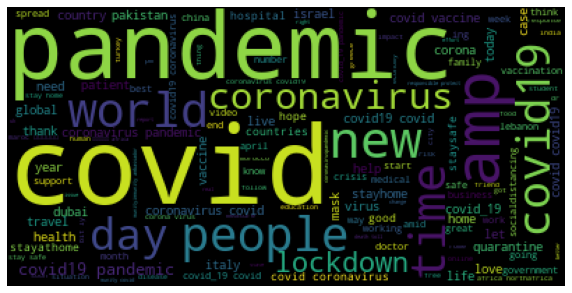

In [38]:
#creating cloud
cloud = WordCloud()
cloud.generate(final_text)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud)

## Sentiment Analysis on tweets

In [39]:
sentiment_analysis = defaultdict(list)
sentiment_analysis['Cleaned_Tweets'] = final_tweets

In [40]:
classifier = pipeline("zero-shot-classification",model="facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [42]:
labels = ['positive', 'negative']
for tweets in final_tweets:
  label = classifier(tweets, labels)
  sentiment_analysis['Label'].append(label['labels'][0])
  sentiment_analysis['Probability'].append(label['scores'][0])


In [43]:
sent_analysis = pd.DataFrame(sentiment_analysis)

In [44]:
sent_analysis.head()

,Cleaned_Tweets,Label,Probability
0,mov suite toypiano johncage filmed beautiful m...,positive,0.913805
1,brain safe streetphotography nikon nikond750 d...,positive,0.736088
2,whoa time f1 lando landonorris spa racing plan...,positive,0.629593
3,till cops sindh police tested positive covid-1...,positive,0.979757
4,crummiebeats luxurylifestyle lamborghini high ...,positive,0.833581


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



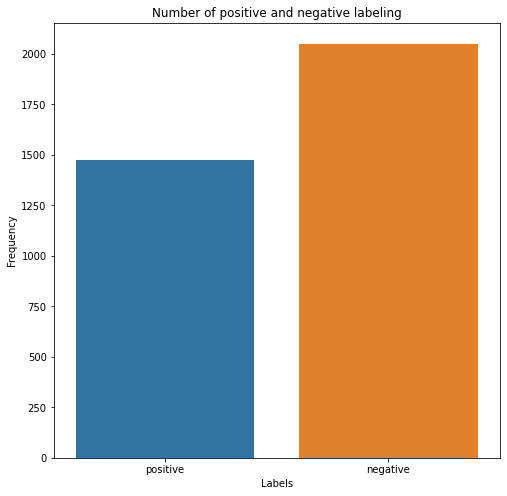

In [51]:
plt.figure(figsize = (8,8))
sns.countplot(sentiment_analysis['Label'])
plt.title('Number of positive and negative labeling')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show();